# DEBER N°3

### NOMBRE: MARÍA BELÉN ROSERO 

OBTENER DATOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datos_fut = pd.read_csv('https://raw.githubusercontent.com/cienciadedatos/datos-de-miercoles/master/datos/2019/2019-04-10/partidos.txt', delimiter='\t')
datos_fut


,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
0,1930,Uruguay,Estadio Pocitos,Montevideo,(1),1930-07-13,Francia,Mexico,4,1
1,1930,Uruguay,Estadio Parque Central,Montevideo,(2),1930-07-13,Estados Unidos,Bélgica,3,0
2,1930,Uruguay,Estadio Parque Central,Montevideo,(3),1930-07-14,Yugoslavia,Brasil,2,1
3,1930,Uruguay,Estadio Pocitos,Montevideo,(4),1930-07-14,Rumania,Perú,3,1
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0
...,...,...,...,...,...,...,...,...,...,...
895,2018,Rusia,Samara Arena,Samara (UTC+4),(60),2018-07-07,Suecia,Inglaterra,0,2
896,2018,Rusia,Saint Petersburg Stadium,St. Petersburg (UTC+3),(61),2018-07-10,Francia,Bélgica,1,0
897,2018,Rusia,Luzhniki Stadium,Moscow (UTC+3),(62),2018-07-11,Croacia,Inglaterra,2,1
898,2018,Rusia,Saint Petersburg Stadium,St. Petersburg (UTC+3),(63),2018-07-14,Bélgica,Inglaterra,2,0


Seleccionar los paises en este caso escogeré los partidos en los que han jugado Francia y tambien Brasil

In [3]:
datos_Francia1 = datos_fut[(datos_fut['equipo_1'] == 'Francia')|(datos_fut['equipo_2'] == 'Francia')]
datos_Brasil = datos_fut[(datos_fut['equipo_1'] == 'Brasil')|(datos_fut['equipo_2'] == 'Brasil')]
datos_FB = pd.concat([datos_Francia1, datos_Brasil])
datos_FB

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
0,1930,Uruguay,Estadio Pocitos,Montevideo,(1),1930-07-13,Francia,Mexico,4,1
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0
9,1930,Uruguay,Estadio Centenario,Montevideo,(10),1930-07-19,Chile,Francia,1,0
19,1934,Italia,Stadio Benito Mussolini,Turin,(2),1934-05-27,Austria,Francia,1,1
37,1938,Francia,Stade Olympique de Colombes,Paris,(3),1938-06-05,Francia,Bélgica,3,1
...,...,...,...,...,...,...,...,...,...,...
845,2018,Rusia,Rostov Arena,Rostov-on-Don (UTC+3),(9),2018-06-17,Brasil,Suiza,1,0
860,2018,Rusia,Saint Petersburg Stadium,Saint Petersburg (UTC+3),(25),2018-06-22,Brasil,Costa Rica,2,0
876,2018,Rusia,Spartak Stadium,Moscow (UTC+3),(41),2018-06-27,Serbia,Brasil,0,2
888,2018,Rusia,Samara Arena,Samara (UTC+4),(53),2018-07-02,Brasil,Mexico,2,0


Como se puede observar se obtuvo una base de los partidos en los que participo Francia y Brasil, pero voy a utilizar una función que me permita identificar si Francia ganó o si Brasil ganó

In [17]:
def gana_francia(francia_gana):
    return francia_gana['equipo_1'] == 'Francia' and francia_gana['equipo_1_final'] > francia_gana['equipo_2_final'] or \
           francia_gana['equipo_2'] == 'Francia' and francia_gana['equipo_2_final'] > francia_gana['equipo_1_final']

def gana_brasil(brasil_gana):
    return brasil_gana['equipo_1'] == 'Brasil' and brasil_gana['equipo_1_final'] > brasil_gana['equipo_2_final'] or \
           brasil_gana['equipo_2'] == 'Brasil' and brasil_gana['equipo_2_final'] > brasil_gana['equipo_1_final'] 

Ahora, con este discriminador podemos poner en una nueva columna, usando la funcion apply, y aplicamos el discriminador para cada fila con el parámetro axis

In [18]:
datos_FB['Francia_gano'] = datos_fut.apply(gana_francia, axis=1)
datos_FB['Brasil_gano'] = datos_fut.apply(gana_brasil, axis=1)
datos_FB.head(5)

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final,Francia_gano,Brasil_gano
0,1930,Uruguay,Estadio Pocitos,Montevideo,(1),1930-07-13,Francia,Mexico,4,1,True,False
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0,False,False
9,1930,Uruguay,Estadio Centenario,Montevideo,(10),1930-07-19,Chile,Francia,1,0,False,False
19,1934,Italia,Stadio Benito Mussolini,Turin,(2),1934-05-27,Austria,Francia,1,1,False,False
37,1938,Francia,Stade Olympique de Colombes,Paris,(3),1938-06-05,Francia,Bélgica,3,1,True,False


In [14]:
datos_FB.dtypes

anio               int64
anfitrion         object
estadio           object
ciudad            object
partido_orden     object
fecha             object
equipo_1          object
equipo_2          object
equipo_1_final     int64
equipo_2_final     int64
Francia_gano        bool
Brasil_gano         bool
dtype: object

como la fecha es un objeto procedo a cambiarlo a fecha para poder ver como se acumula en cada año cuantos partidos ganó Francia y Brasil respectivamente, ya que quiero comparar cuantos partidos ganaron a través del tiempo. 

In [29]:
datos_FB['fecha'] = pd.to_datetime(datos_FB['fecha'])

In [ ]:
francia_gano = datos_FB[datos_FB['Francia_gano'] == True]
brasil_gano = datos_FB[datos_FB['Brasil_gano'] == True]
francia= francia_gano.groupby(francia_gano['fecha'].dt.year).size().cumsum()
brasil= brasil_gano.groupby(brasil_gano['fecha'].dt.year).size().cumsum()
francia

In [23]:
brasil

fecha
1930     1
1938     5
1950    10
1954    11
1958    17
1962    22
1966    23
1970    29
1974    32
1978    36
1982    40
1986    44
1990    47
1994    53
1998    58
2002    65
2006    69
2010    72
2014    76
2018    80
dtype: int64

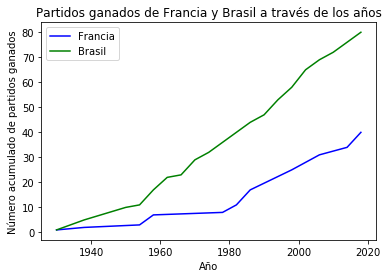

In [45]:
plt.plot(francia.index, francia.values, label='Francia', color='blue')
plt.plot(brasil.index,brasil.values, label='Brasil', color='green')
plt.xlabel("Año")
plt.ylabel("Número acumulado de partidos ganados")
plt.title("Partidos ganados de Francia y Brasil a través de los años")
plt.legend()
plt.savefig('partidos_vs.tiff')

Podemos observar que Brasil es considerablemente superior en partidos ganados que Francia

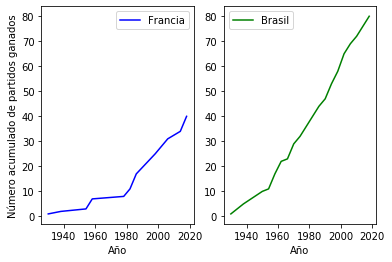

In [44]:
fig = plt.figure()
eje = fig.add_subplot(1, 2, 1)
plt.plot(francia.index, francia.values, label='Francia', color='blue')
eje.legend()
eje2 = fig.add_subplot(1, 2, 2, sharey = eje)
plt.plot(brasil.index,brasil.values, label='Brasil', color='green')
eje.set_xlabel('Año')
eje2.set_xlabel('Año')
eje2.legend()
eje.set_ylabel('Número acumulado de partidos ganados')
plt.savefig('partidos.tiff')

<Figure size 432x288 with 0 Axes>